<a href="https://colab.research.google.com/github/unagarjuna12l/unagarjuna12l/blob/main/ClassificationAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Title of Project: Hand Written Digit Prediction - Classification Analysis**


# **Objective:**

Build a machine learning model to predict handwritten digits.


# **Data Source:**

The digits dataset consists of 8x8 pixel images of digits.

# **Import Library**

- Pandas, NumPy, Matplotlib for data manipulation and visualization.
- `load_digits` from `sklearn.datasets` for loading the digits dataset.
- `train_test_split` from `sklearn.model_selection` for splitting the data into training and testing sets.
- `RandomForestClassifier` from `sklearn.ensemble` for building a Random Forest model.
- `confusion_matrix` and `classification_report` from `sklearn.metrics` for model evaluation.


In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
from sklearn.datasets import load_digits

# **Import Data:**

- Load the digits dataset using `load_digits()`.

In [ ]:
df = load_digits()

# **Describe Data:**

- Display the first 4 images from the dataset along with their labels.



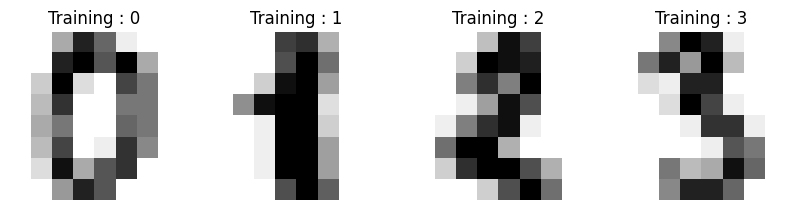

In [ ]:
_,axes=plt.subplots(nrows=1,ncols=4,figsize=(10,3))
for ax,image,label in zip(axes,df.images,df.target):
    ax.set_axis_off()
    ax.imshow(image,cmap=plt.cm.gray_r,interpolation="nearest")
    ax.set_title("Training : %i"%label)

#**Data Preprocessing**

In [ ]:
df.images.shape

(1797, 8, 8)

In [ ]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [ ]:
df.images[0].shape

(8, 8)

In [ ]:
len(df.images)

1797

In [ ]:
n_samples=len(df.images)
data=df.images.reshape((n_samples,-1))

In [ ]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
data[0].shape

(64,)

In [ ]:
data.shape

(1797, 64)

**Scaling Image Data**

In [ ]:
data.min()

0.0

In [ ]:
data.max()

16.0

In [ ]:
data=data/16

In [ ]:
data.min()

0.0

In [ ]:
data.max()

1.0

In [ ]:
# @title
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

#**Train Test Split Data**




- Split the data into training and testing sets using `train_test_split`.


In [ ]:
from sklearn.model_selection import train_test_split

**Define Target Variable (y) and Feature Variables (X):**

- Target variable (y): `df.target`
- Feature variables (X): `data`

In [ ]:
X_train,X_test,y_main,y_test = train_test_split(data,df.target,test_size=0.3)

In [ ]:
X_train.shape,X_test.shape,y_main.shape,y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

# **Random Forest Model**

- Build a Random Forest model using `RandomForestClassifier`.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf= RandomForestClassifier()

In [ ]:
rf.fit(X_train,y_main)

RandomForestClassifier()

# **Predict Test Data**

In [ ]:
y_pred=rf.predict(X_test)

In [ ]:
y_pred

array([4, 4, 8, 4, 0, 0, 2, 8, 3, 7, 3, 8, 7, 1, 2, 3, 7, 8, 1, 2, 8, 8,
       6, 1, 9, 3, 7, 1, 1, 8, 1, 2, 1, 4, 0, 9, 6, 0, 4, 1, 2, 4, 6, 3,
       5, 5, 5, 8, 1, 1, 1, 9, 1, 6, 1, 2, 1, 9, 1, 8, 0, 5, 2, 3, 1, 4,
       8, 5, 4, 9, 4, 0, 2, 9, 2, 1, 6, 1, 5, 9, 7, 8, 9, 1, 6, 2, 7, 3,
       2, 5, 9, 9, 1, 5, 0, 0, 3, 5, 4, 7, 1, 1, 1, 6, 8, 7, 6, 7, 4, 7,
       5, 5, 3, 4, 1, 2, 4, 5, 4, 5, 6, 6, 6, 7, 1, 4, 7, 2, 3, 1, 3, 2,
       0, 4, 9, 7, 0, 9, 7, 9, 9, 4, 1, 8, 4, 3, 7, 0, 9, 8, 4, 8, 2, 2,
       5, 8, 4, 8, 7, 3, 6, 6, 8, 0, 9, 3, 6, 7, 0, 3, 8, 2, 3, 7, 4, 4,
       4, 7, 5, 9, 0, 9, 3, 0, 1, 5, 0, 0, 0, 2, 1, 2, 7, 2, 5, 8, 1, 8,
       3, 0, 7, 9, 6, 3, 0, 4, 0, 8, 5, 2, 0, 4, 1, 0, 3, 1, 8, 3, 2, 3,
       8, 2, 6, 6, 3, 6, 8, 1, 9, 2, 1, 3, 7, 8, 5, 8, 8, 8, 3, 8, 8, 9,
       9, 1, 9, 8, 0, 0, 5, 7, 1, 3, 5, 5, 1, 1, 8, 5, 0, 0, 0, 0, 3, 6,
       8, 0, 9, 4, 0, 2, 6, 5, 4, 7, 6, 6, 4, 1, 3, 5, 9, 6, 2, 9, 6, 9,
       5, 1, 0, 9, 2, 0, 9, 6, 7, 0, 8, 2, 5, 1, 5,

# **Model Evaluation:**

- Predict the test data using the trained model.
- Evaluate the model using a confusion matrix and a classification report.

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
confusion_matrix(y_test,y_pred)

array([[56,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 68,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  1, 49,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 56,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 53,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0,  0, 46,  0,  0,  0,  1],
       [ 1,  0,  0,  0,  0,  0, 47,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 60,  1,  1],
       [ 0,  1,  1,  0,  0,  0,  0,  0, 48,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 42]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97        57
           1       0.97      0.99      0.98        69
           2       0.96      0.96      0.96        51
           3       1.00      0.97      0.98        58
           4       0.98      0.96      0.97        55
           5       0.98      0.98      0.98        47
           6       1.00      0.96      0.98        49
           7       0.98      0.97      0.98        62
           8       0.94      0.96      0.95        50
           9       0.93      1.00      0.97        42

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



# **Explanation:**


- The provided code demonstrates the entire process of loading data, preprocessing, model training, evaluation, and prediction for handwritten digit classification using a Random Forest model.
